In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [109]:
traindata=pd.read_csv('Bigdatamart_train.csv')
testdata=pd.read_csv('Bigdatamart_test.csv')

In [110]:
traindata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [111]:
testdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [112]:
testdata.shape

(5681, 11)

In [113]:
traindata.shape

(8523, 12)

* train data has 12 columns in total which consists of 11 input columns and 1 output column(Item_Outlet_Sales).
* test data has only 11 input columns and we have to predict the Item_Outlet_Sales here. 

* Now we can add Item_Outlet_Sales column to test data and merge both the data for EDA process 
* Another column can be added to the data to identify the source as train and test

In [114]:
testdata['datasource']='test'
traindata['datasource']='train'

In [115]:
testdata['Item_Outlet_Sales'] = 0
testdata.shape

(5681, 13)

In [116]:
Bigdatamartdata = pd.concat([traindata,testdata],ignore_index=True)

In [117]:
Bigdatamartdata.shape

(14204, 13)

In [118]:
df=pd.DataFrame(Bigdatamartdata)

In [119]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,datasource
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [120]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'datasource'],
      dtype='object')

In [121]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
datasource                    object
dtype: object

In [122]:
categorial_columns=df.select_dtypes(include=[object])
categorial_columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,datasource
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test


In [123]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

* Low Fat, LF, low fat can be catogorized as 1 catogary
* reg and Regular can be catogorized as 1

In [124]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular',})

In [125]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [126]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [127]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [128]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [129]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [130]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'datasource'],
      dtype='object')

In [131]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [132]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [133]:
for columns in categorial_columns:
    print(df[columns].value_counts())

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium    4655
Small     3980
High      1553
Name: 

In [134]:
df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,datasource
3499,FDO44,12.6,Low Fat,0.087631,Fruits and Vegetables,110.0228,OUT045,2002,NaN,Tier 2,Supermarket Type1,3205.1612,train


In [135]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,datasource
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

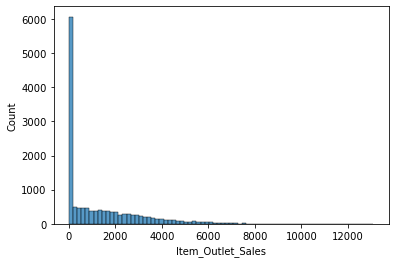

In [136]:
sns.histplot(df['Item_Outlet_Sales'])

* Output data has positive skewness

We can check for the relation Item_Outlet_Sales has with each input column

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

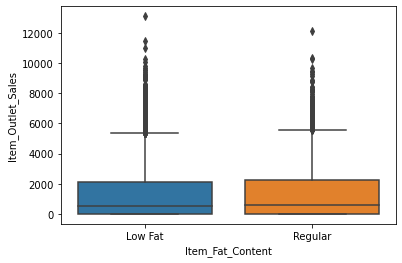

In [137]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

* graph show almost equal sales for both Low fat and regular fat content items with outliers present

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

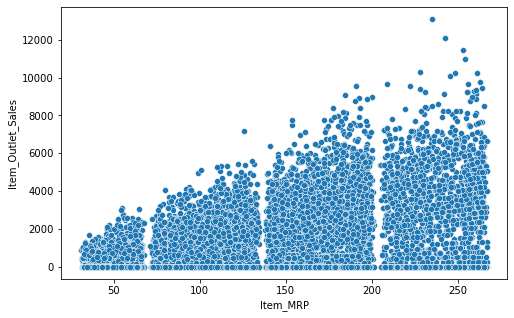

In [138]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)

* We can see that the sales increaded for higher mrp products

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

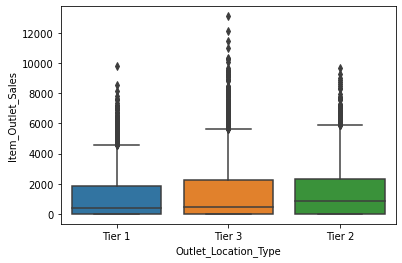

In [139]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

* Higher the sales is in Tier 3 city than in Tier 1 and 2, Outliers exists

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

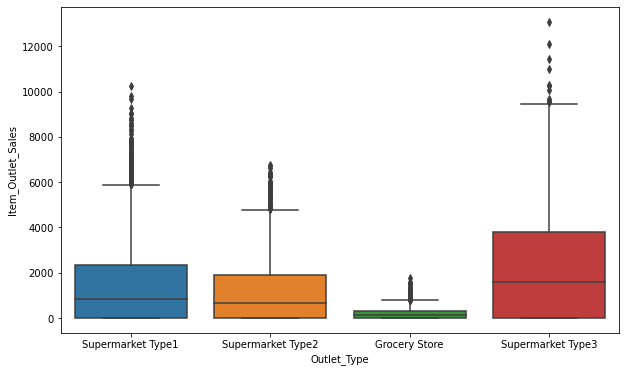

In [140]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

* Grocery store make the least sales
* Supermarket Type 3 makes the highest compared to other types

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

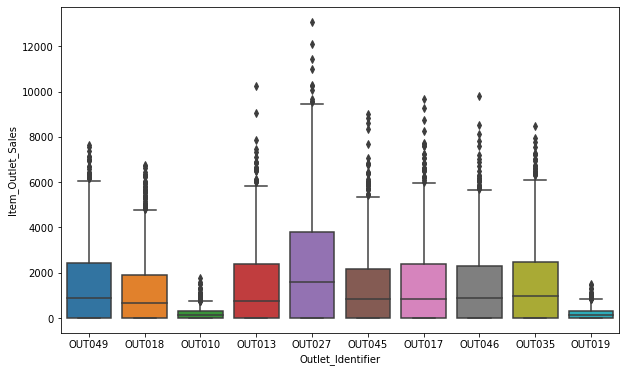

In [141]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)

* Sales is highest for the identifier OUT027 and least for OUT019 and OUT010

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

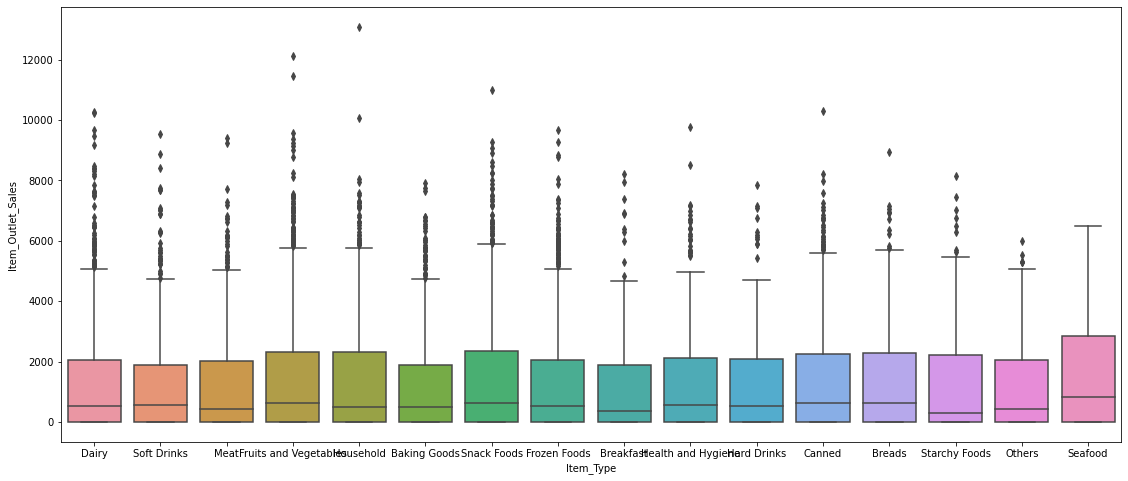

In [142]:
plt.figure(figsize = (19,8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)

* Almost all the products has equal sales by above graph

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

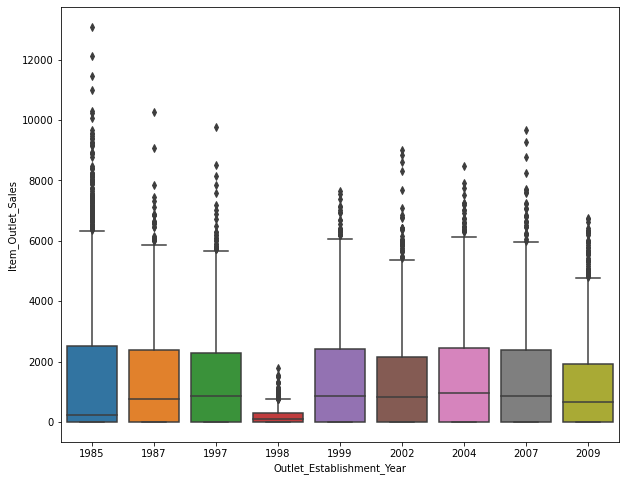

In [143]:
plt.figure(figsize = (10,8))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)

* almost equal sales is done by the outlets establised in the years 1985, 1987, 1997, 1999, 2004, 2007
* Outlets established in the year 1998 is the one which made least sales

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

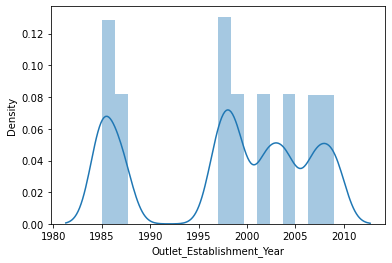

In [144]:
sns.distplot(df['Outlet_Establishment_Year'])

* Highest No of Outlets are established in the years 1985 to 1990 and 1995 to 2000

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Count'>

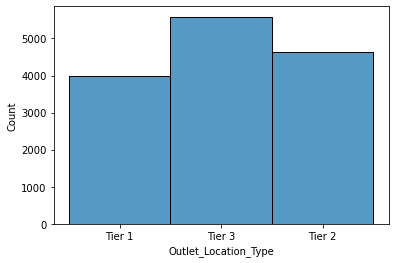

In [145]:
sns.histplot(df['Outlet_Location_Type'])

* Highest No of Outlets are established in Tier 3 City.
* Lesser Outlets in Tier 1 Compared to other 2

In [146]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
datasource                      0
dtype: int64

* there are missing values in Item_Weight and Outlet_Size, instead of dropping these rows we can impute them
* First we can impute Item_Weight with mean of the values 
* Outlet_Size can be imputed with mode(most frequent)

In [147]:
from sklearn.impute import SimpleImputer

In [148]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Item_Weight']=imputer.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [149]:
imp = SimpleImputer(missing_values=np.nan, strategy='mode')
df['Outlet_Size']=imputer.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [150]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
datasource                   0
dtype: int64

* all the missing values are imputed

In [151]:
categorial_columns=df.select_dtypes(include=[object])
categorial_columns.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,datasource
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train


In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [153]:
cat_df=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for columns in cat_df:
    df[columns] = le.fit_transform(df[columns])

In [154]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
datasource                    object
dtype: object

* All the data are in float and int dtypes

In [155]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,780.193889,13.618300,0.353351,0.065953,7.229372,141.004977,4.722473,1997.830681,1.170867,1.112856,1.201281,1308.865489
std,449.619658,4.606037,0.478027,0.051459,4.213471,62.086938,2.837101,8.371664,0.600306,0.812755,0.796543,1699.791423
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,0.000000
25%,391.000000,9.300000,0.000000,0.027036,4.000000,94.012000,2.000000,1987.000000,1.000000,0.000000,1.000000,0.000000
50%,782.000000,14.500000,0.000000,0.054021,6.000000,142.247000,5.000000,1999.000000,1.000000,1.000000,1.000000,559.272000
75%,1169.000000,17.600000,1.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,2.000000,2.000000,1.000000,2163.184200
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Key Observations :
* Mean > median only in Item_Outlet_Sales, there is a left skewness present in that column
* There is a huge gap between 75th percentile and max in the columns Item_Identifier, Item_Weight, Item_Type, Item_MRP, Outlet_Identifier,Item_Outlet_Sales, hence outliers are present
* In culumns like Item_Outlet_Sales,Outlet_Establishment_Year,Item_MRP, Item_Identifier, Item_Weight there is high difference between mean and std, hence the data is highly spreaded

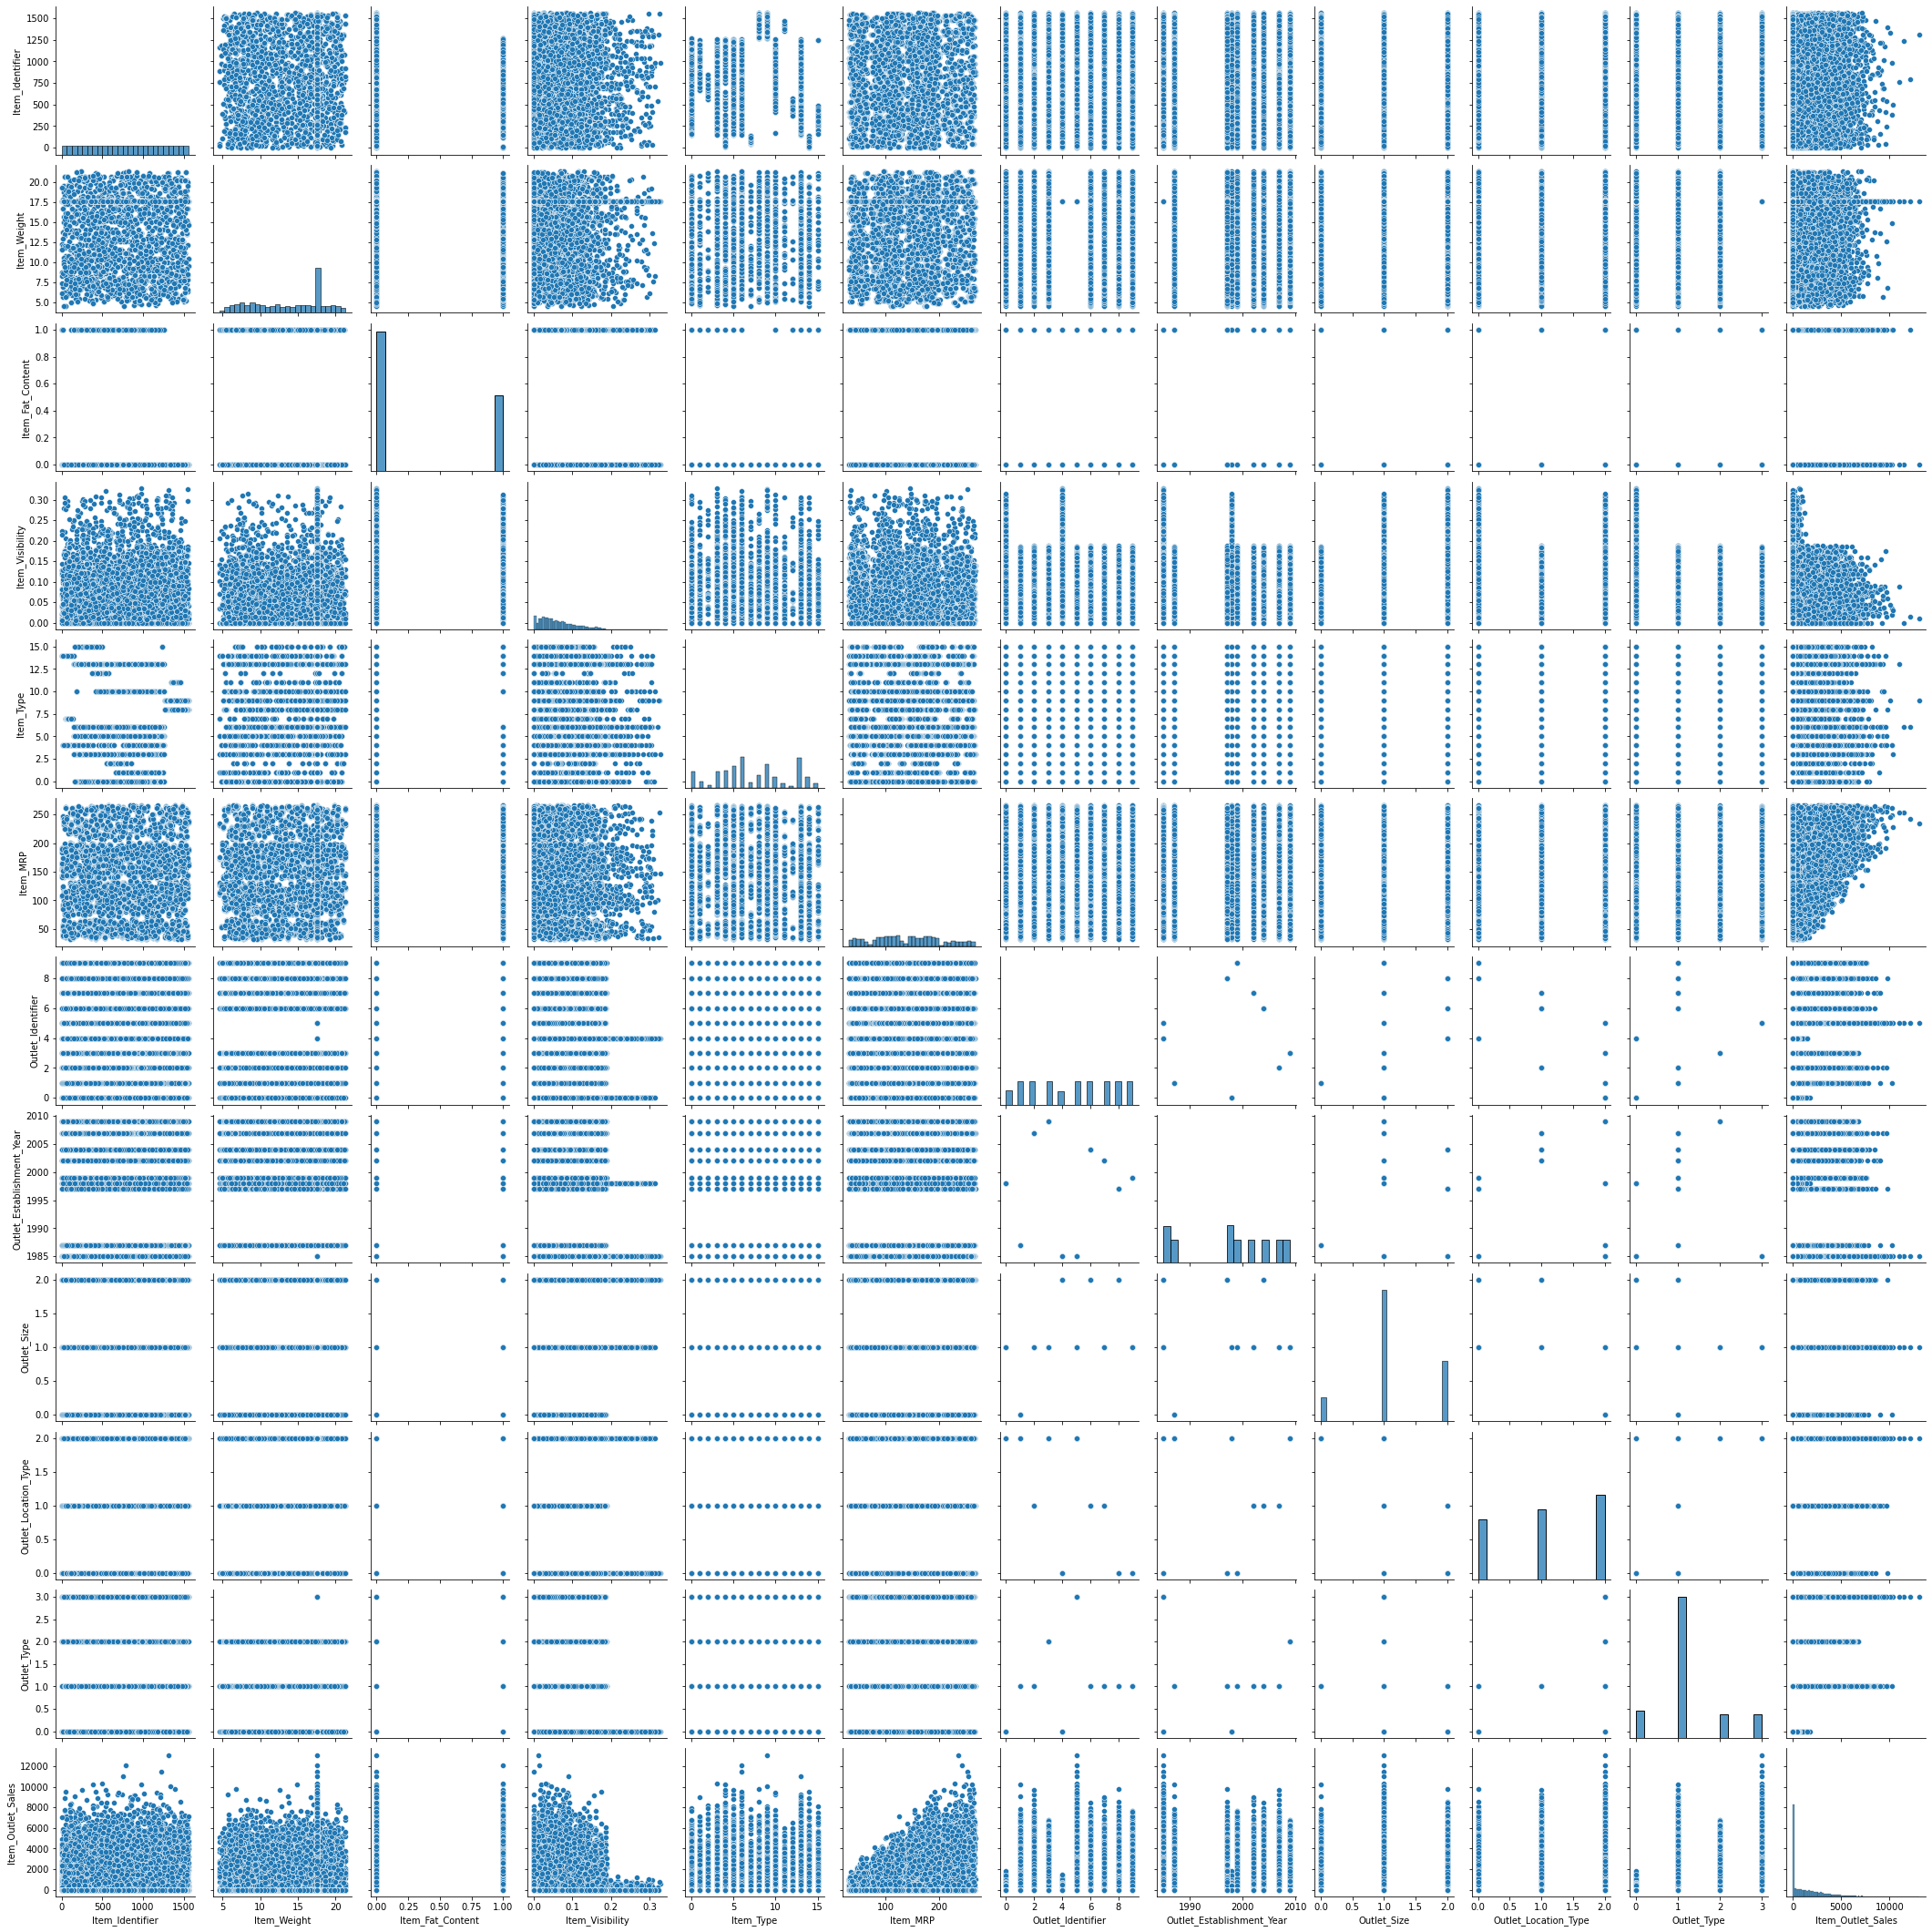

In [156]:
sns.pairplot(df)

In [157]:
df.skew()

Item_Identifier             -0.004897
Item_Weight                 -0.261745
Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.544684
dtype: float64

In [158]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

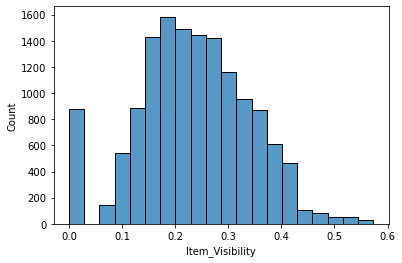

In [159]:
sns.histplot(df['Item_Visibility'],bins=20)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

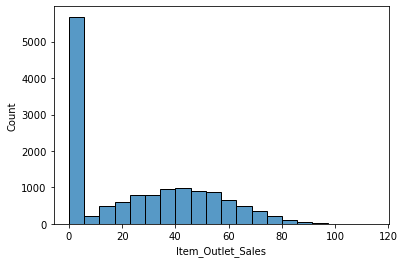

In [160]:
df['Item_Outlet_Sales']=np.sqrt(df['Item_Outlet_Sales'])
sns.histplot(df['Item_Outlet_Sales'],bins=20)

In [161]:
df.skew()

Item_Identifier             -0.004897
Item_Weight                 -0.261745
Item_Fat_Content             0.613645
Item_Visibility             -0.096758
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            0.457386
dtype: float64

In [162]:
df['datasource']=le.fit_transform(df['datasource'])

In [163]:
#Checking for outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,datasource
0,1.388320,0.937563,0.739212,0.997847,0.766467,1.752511,1.507764,0.139681,0.284644,1.369286,0.252702,1.391963,0.816425
1,1.717498,1.671409,1.352792,0.884136,1.606957,1.493696,0.607145,1.334228,0.284644,1.091566,1.002766,0.185521,0.816425
2,0.262885,0.842771,0.739212,0.971842,0.657587,0.009874,1.507764,0.139681,0.284644,1.369286,0.252702,0.788671,0.816425
3,0.758014,1.211865,1.352792,2.181654,0.291782,0.661838,1.664600,0.020226,0.284644,1.091566,1.508171,0.050951,0.816425
4,1.149470,1.017896,0.739212,2.181654,0.420245,1.403623,1.312115,1.293777,1.950518,1.091566,0.252702,0.227232,0.816425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,1.217058,0.677027,1.352792,1.096003,1.369614,0.005000,1.155279,0.099229,1.381231,1.369286,0.252702,1.014766,1.224853
14200,1.050244,1.306657,1.352792,1.352084,1.844299,0.453249,0.607145,1.334228,0.284644,1.091566,1.002766,1.014766,1.224853
14201,1.436389,0.785584,0.739212,0.352355,0.182903,0.358558,0.802794,0.498045,0.284644,0.138860,0.252702,1.014766,1.224853
14202,0.576494,0.365121,1.352792,2.181654,1.003809,1.185747,0.959630,1.095319,0.284644,0.138860,0.252702,1.014766,1.224853


In [164]:
Threshold=3
print(np.where(z>3))

(array([  854,  1450,  1805,  2855,  3750,  4349,  4382,  5223,  7188,
        7250,  9381,  9779, 11132, 11366, 12731], dtype=int64), array([ 3, 11,  3,  3,  3, 11,  3, 11, 11,  3,  3,  3,  3,  3,  3],
      dtype=int64))


In [165]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,datasource
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775,1
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607,1
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,27.062520,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,31.538947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.116174,13,141.3154,8,1997,2,0,1,0.000000,0
14200,308,7.60,1,0.378141,15,169.1448,3,2009,1,2,2,0.000000,0
14201,1426,10.00,0,0.271162,8,118.7440,7,2002,1,1,1,0.000000,0
14202,521,15.30,1,0.000000,3,214.6218,2,2007,1,1,1,0.000000,0


In [166]:
print("old data shape : " ,df.shape)
print("New data shape after removing outliers : ",df_new.shape)

old data shape :  (14204, 13)
New data shape after removing outliers :  (14189, 13)


In [167]:
df_new.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,datasource
Item_Identifier,1.000000,0.044640,-0.110867,-0.042091,-0.012114,0.010573,-0.000786,-0.002411,0.002385,-0.002531,-0.004328,0.000267,-0.001314
Item_Weight,0.044640,1.000000,-0.027682,0.019714,0.024702,0.029504,-0.002484,-0.273584,0.057636,0.035136,0.162863,0.017365,0.014028
Item_Fat_Content,-0.110867,-0.027682,1.000000,0.040394,-0.147597,-0.003878,-0.001001,-0.000291,-0.000327,0.001050,-0.000288,0.006389,-0.001462
Item_Visibility,-0.042091,0.019714,0.040394,1.000000,-0.037378,-0.000078,-0.084733,-0.062669,0.049123,-0.010130,-0.127139,-0.050974,0.003384
Item_Type,-0.012114,0.024702,-0.147597,-0.037378,1.000000,0.043906,0.000737,0.003236,-0.002684,0.002279,0.003805,0.007426,-0.000755
Item_MRP,0.010573,0.029504,-0.003878,-0.000078,0.043906,1.000000,-0.000764,0.000947,-0.000977,0.000494,-0.001033,0.243844,-0.000676
Outlet_Identifier,-0.000786,-0.002484,-0.001001,-0.084733,0.000737,-0.000764,1.000000,0.079010,0.505083,-0.716705,0.099139,0.091709,-0.000208
Outlet_Establishment_Year,-0.002411,-0.273584,-0.000291,-0.062669,0.003236,0.000947,0.079010,1.000000,0.194588,-0.090052,-0.122984,0.004475,0.000484
Outlet_Size,0.002385,0.057636,-0.000327,0.049123,-0.002684,-0.000977,0.505083,0.194588,1.000000,-0.613985,-0.200838,-0.045154,0.000016
Outlet_Location_Type,-0.002531,0.035136,0.001050,-0.010130,0.002279,0.000494,-0.716705,-0.090052,-0.613985,1.000000,0.467122,0.032477,-0.000204


<AxesSubplot:>

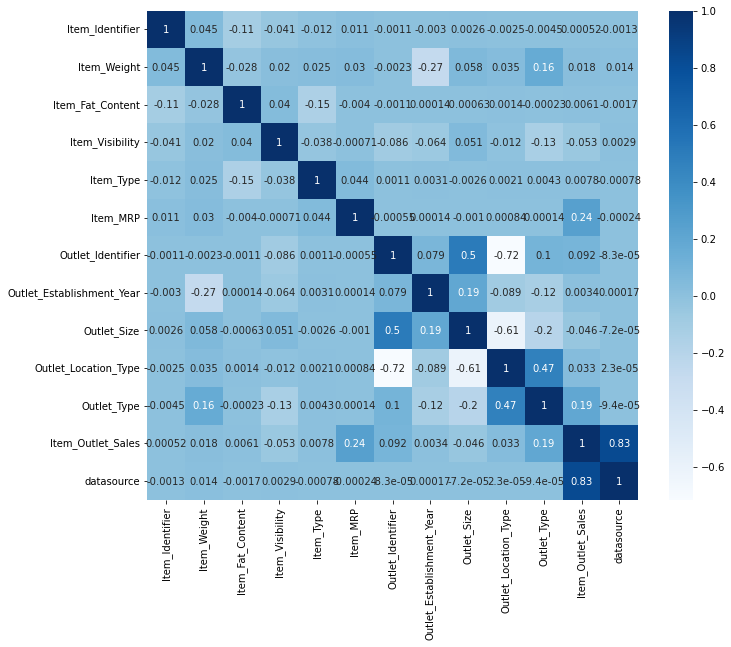

In [168]:
plt.figure(figsize = (11,9))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

* Item_Outlet_Sales has negative correlation with Outlet_Size and item_Visibility
* Item_Outlet_Sales is highly correlated with Item_MRP (0.24) compared to others

In [169]:
# Checking for multicolinearity

x=df_new.iloc[:,0:-2]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.116174,13,141.3154,8,1997,2,0,1
14200,308,7.60,1,0.378141,15,169.1448,3,2009,1,2,2
14201,1426,10.00,0,0.271162,8,118.7440,7,2002,1,1,1
14202,521,15.30,1,0.000000,3,214.6218,2,2007,1,1,1


In [170]:
y=df_new.iloc[:,-2]
y

0        61.115775
1        21.057607
2        45.795961
3        27.062520
4        31.538947
           ...    
14199     0.000000
14200     0.000000
14201     0.000000
14202     0.000000
14203     0.000000
Name: Item_Outlet_Sales, Length: 14189, dtype: float64

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [173]:
vif_calc()

    VIF Factor                   Features
0     4.077459            Item_Identifier
1    10.240652                Item_Weight
2     1.604072           Item_Fat_Content
3     5.967985            Item_Visibility
4     4.049128                  Item_Type
5     6.178829                   Item_MRP
6    15.714473          Outlet_Identifier
7    59.524900  Outlet_Establishment_Year
8     7.983425                Outlet_Size
9    16.736563       Outlet_Location_Type
10    8.750201                Outlet_Type


* Outlet_Establishment_Year and Outlet_Location_Type has high values which are creating colinearities
* Outlet_Establishment_Year gives 0.0034 cotribution for Item_Outlet_sales where as Outlet_Location_Type gives 0.03 contribution, through comparisions we can tell that Year is paying lesser contribution and thaat column can be dropped

In [174]:
df_new.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [175]:
x=df_new.iloc[:,0:-2]
vif_calc()

   VIF Factor              Features
0    3.847339       Item_Identifier
1    8.934393           Item_Weight
2    1.566579      Item_Fat_Content
3    5.426933       Item_Visibility
4    3.826475             Item_Type
5    5.726468              Item_MRP
6    9.986452     Outlet_Identifier
7    6.893985           Outlet_Size
8    9.117681  Outlet_Location_Type
9    7.507163           Outlet_Type


In [176]:
# Droping the datasource column and holding back the cleansed data

df_new.drop(['datasource'],axis=1,inplace=True)

In [178]:
df_new.shape

(14189, 11)

In [180]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [188]:
#Standardizing input data

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.38760407, -0.93696061, -0.73936025, ..., -0.28411269,
        -1.369716  , -0.25350693],
       [-1.71673585, -1.67070959,  1.35252063, ..., -0.28411269,
         1.0918001 ,  1.00330992],
       [-0.26232921,  0.84314047, -0.73936025, ..., -0.28411269,
        -1.369716  , -0.25350693],
       ...,
       [ 1.43670241, -0.78500076, -0.73936025, ..., -0.28411269,
        -0.13895795, -0.25350693],
       [-0.57589394,  0.36555238,  1.35252063, ..., -0.28411269,
        -0.13895795, -0.25350693],
       [ 0.48266503, -0.89354351,  1.35252063, ..., -0.28411269,
        -0.13895795, -0.25350693]])

In [189]:
x.shape

(14189, 10)

In [190]:
y.shape

(14189,)

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [196]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10641, 10), (10641,), (3548, 10), (3548,))

In [197]:
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()

In [198]:
model=[lm,DTR,KNR,svr]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Score of ",m,"is :",m.score(x_train,y_train))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Mean squared error :",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))

Score of  LinearRegression() is : 0.10781632614006309
Errors of  LinearRegression() is
Mean absolute error : 21.41850760666705
Mean squared error : 591.7014462783666
Root mean squared error : 24.324914106289597
Score of  DecisionTreeRegressor() is : 1.0
Errors of  DecisionTreeRegressor() is
Mean absolute error : 25.32528371441518
Mean squared error : 1160.4348305378974
Root mean squared error : 34.0651556658398
Score of  KNeighborsRegressor() is : 0.3043511692486863
Errors of  KNeighborsRegressor() is
Mean absolute error : 21.695252094859445
Mean squared error : 687.8749117807904
Root mean squared error : 26.227369516991033
Score of  SVR() is : 0.0693523617864813
Errors of  SVR() is
Mean absolute error : 20.732078516461502
Mean squared error : 621.7357387110188
Root mean squared error : 24.93462930767207


* Score of Decission tree can be considered best as it is 1.0

In [199]:
from sklearn.model_selection import cross_val_score

In [201]:
model=[lm,DTR,KNR,svr]
for i in model:
    score=cross_val_score(i,x_train,y_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())

score of  LinearRegression() is : [0.11692705 0.11456248 0.10652969 0.07955825 0.1033468 ]
score mean of  LinearRegression() is : 0.10418485582105044
score std of  LinearRegression() is : 0.013287053811706471
score of  DecisionTreeRegressor() is : [-0.80094886 -0.76243407 -0.82330089 -0.85132391 -0.78431788]
score mean of  DecisionTreeRegressor() is : -0.80446512294149
score std of  DecisionTreeRegressor() is : 0.03077471988192812
score of  KNeighborsRegressor() is : [-0.02812177 -0.03061708 -0.06224442 -0.05274175 -0.07413943]
score mean of  KNeighborsRegressor() is : -0.04957288978828602
score std of  KNeighborsRegressor() is : 0.017852715691554954
score of  SVR() is : [ 0.06671546  0.0889656   0.0775927  -0.02197175  0.05146242]
score mean of  SVR() is : 0.05255288339123256
score std of  SVR() is : 0.039264659024985514


In [203]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV

In [204]:
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}

In [205]:
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [206]:
grd.best_params_

{'criterion': 'poisson'}

In [207]:
grd.best_score_

-0.6126537624360603

In [209]:
from sklearn.linear_model import Ridge
param_alpha={'alpha':[.0001,.001,.01,.1]}
rd=Ridge()
gd=GridSearchCV(estimator=rd,param_grid=param_alpha,cv=5)
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [210]:
gd.best_score_

0.10418488675587423

In [212]:
gd.best_params_

{'alpha': 0.1}

*DTR model gives the best results, we can save this model

In [217]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [218]:
dtr.score(x_train,y_train)

1.0

In [219]:
pred=dtr.predict(x_test)

In [220]:
print("Predicted values :",pred)

Predicted values : [66.90421063 13.40768436  0.         ...  0.         28.21873137
 45.883108  ]


In [221]:
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared error :",mean_squared_error(y_test,pred))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error : 25.319158636579836
Mean squared error : 1158.352661711128
Root mean squared error : 34.03458038100555


In [222]:
from sklearn.metrics import r2_score

In [223]:
print(r2_score(y_test,pred))

-0.7680230444066551


In [ ]:
#predicting sales by giving new inputs

In [226]:
a=np.array([1121,19.20,0,0.0,6,18209,0,1,2,0])

In [227]:
a.shape

(10,)

In [228]:
a=a.reshape(1,-1)

In [229]:
a.shape

(1, 10)

In [231]:
dtr.predict(a)

array([78.0261187])

In [232]:
import pandas as pd
df1=pd.DataFrame(pred)
df1.to_csv('Big_Data_Mart_Sales.csv')